### Разработка решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность для интернет-магазина 

#### ОПИСАНИЕ ДАННЫХ

#### market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, 
о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

#### market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время. 
- минут — значение времени, проведённого на сайте, в минутах.


#### money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.


### Загрузка данных

In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score
# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")
import shap
from shap import PermutationExplainer
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [70]:
market_file = pd.read_csv('market_file.csv', decimal = ',')
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

In [71]:
market_money = pd.read_csv('market_money.csv', decimal = ',')
market_money

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


In [72]:
market_time = pd.read_csv('market_time.csv', decimal = ',')
market_time

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [73]:
money = pd.read_csv('money.csv', sep = ';', decimal = ',')
money

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


#### Во всех датафреймах столбцы названы некорректно, переименуем их

In [74]:
# функция переименования столбцов
def rename_columns(df, old_name, new_name):
    if len(old_name)==len(new_name):
        dictionary = dict(zip(old_name, new_name))
        return df.rename(columns=dictionary)
    else: 
        return 'Проверьте длину списка!'

In [75]:
# заменим названия столбцов
market_file_old_name=market_file.columns
market_file_new_name=['id', 'customer_activity', 'service_type', 'allow_report',
'active_6_months', 'market_active', 'duration', 'promo_purchases', 'popular_category',
 'average_view','unpaid_product', 'service_error','page_visit']

market_money_old_name=market_money.columns
market_money_new_name=['id', 'money_period', 'revenue']

market_time_old_name=market_time.columns
market_time_new_name=['id', 'time_period', 'minutes']

money_old_name=money.columns
money_new_name=['id', 'profit']

market_file=rename_columns(market_file, market_file_old_name,  market_file_new_name)
market_money=rename_columns(market_money, market_money_old_name, market_money_new_name)
market_time=rename_columns(market_time, market_time_old_name, market_time_new_name)
money=rename_columns(money, money_old_name, money_new_name)

#### Вывод:

    - Все данные загружены 
    - Изменены названия столбцов на корректные 

####  Предобработка данных

#### Добавим функцию, которая выводит количество и процент пропусков данных

In [76]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1300 non-null   int64 
 1   customer_activity  1300 non-null   object
 2   service_type       1300 non-null   object
 3   allow_report       1300 non-null   object
 4   active_6_months    1300 non-null   object
 5   market_active      1300 non-null   int64 
 6   duration           1300 non-null   int64 
 7   promo_purchases    1300 non-null   object
 8   popular_category   1300 non-null   object
 9   average_view       1300 non-null   int64 
 10  unpaid_product     1300 non-null   int64 
 11  service_error      1300 non-null   int64 
 12  page_visit         1300 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 132.2+ KB


#### Тип данных в нектороых колонках указан неверно

In [77]:
# поменяем тип данных
market_file['active_6_months'] = market_file['active_6_months'].astype('float')
market_file['promo_purchases'] = market_file['promo_purchases'].astype('float')

market_file.head()

,id,customer_activity,service_type,allow_report,active_6_months,market_active,duration,promo_purchases,popular_category,average_view,unpaid_product,service_error,page_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [78]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3900 non-null   int64 
 1   money_period  3900 non-null   object
 2   revenue       3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [79]:
market_money['revenue'] = market_money['revenue'].astype('float')

In [80]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2600 non-null   int64 
 1   time_period  2600 non-null   object
 2   minutes      2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [81]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


#### Перед проверкой на дубликаты заменим все буквы в словах на строчные

In [82]:
# функция по уменьшению букв
def df_lower(df, lower_list):
    for value in lower_list:
        df[value]=df[value].str.lower()
        
market_file_lower_list=['customer_activity', 'service_type', 'allow_report', 'popular_category']
df_lower(market_file, market_file_lower_list)

#### Проверим количество дубликатов

In [83]:
print(market_file.duplicated().sum())
print('--------------')
print(market_money.duplicated().sum())
print('--------------')
print(market_time.duplicated().sum())
print('--------------')
print(money.duplicated().sum())

0
--------------
0
--------------
0
--------------
0


#### Дубликатов не обнаружено

#### Выводы

- заменены запятые на точки в некоторых столбцах
- буквы заменены на строчные
- типы столбцов преобразованы. 
- проверено наличие пропущенных значений. 
- проверены дубликаты

#### Исследовательский анализ данных

#### Рассмотрим количественные признаки market_file

In [84]:
# Функция построения гистограмм с нанесенной медианой и средним
def hist_visio(df_ser, names, y_lim, bins):
    bins = bins # создаем массив бинов, где каждый бин - это целое число от 0 до максимального значения в датафрейме
    plt.hist(df_ser, bins=bins) # строим гистограмму
    plt.title(names[0], fontsize=16)
    plt.xlabel(names[1], fontsize=16)
    plt.ylabel(names[2], fontsize=16)
    median = df_ser.median()
    mean = df_ser.mean()
    plt.axvline(median, color='red', linestyle='-')
    plt.axvline(mean, color='green', linestyle='-')
    plt.ylim(y_lim[0], y_lim[1])
    plt.xlim(min(df_ser), max(df_ser))
    plt.legend(['Медиана', 'Среднее'], loc='upper left')
    plt.show()

In [85]:
# функция построения boxplot
def boxplot_painting(df, column_list):
    for column in column_list:
        df.boxplot(column=column)
        plt.title('Ящик с усами '+ column, fontsize=16)
        plt.show()

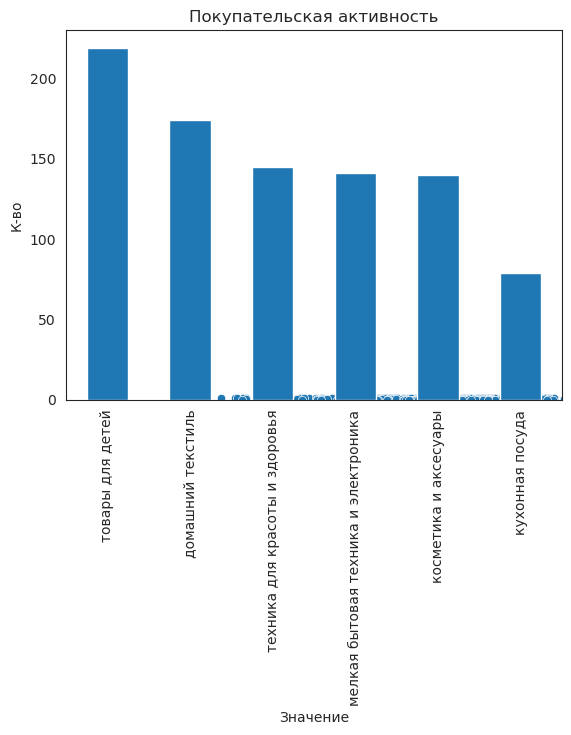

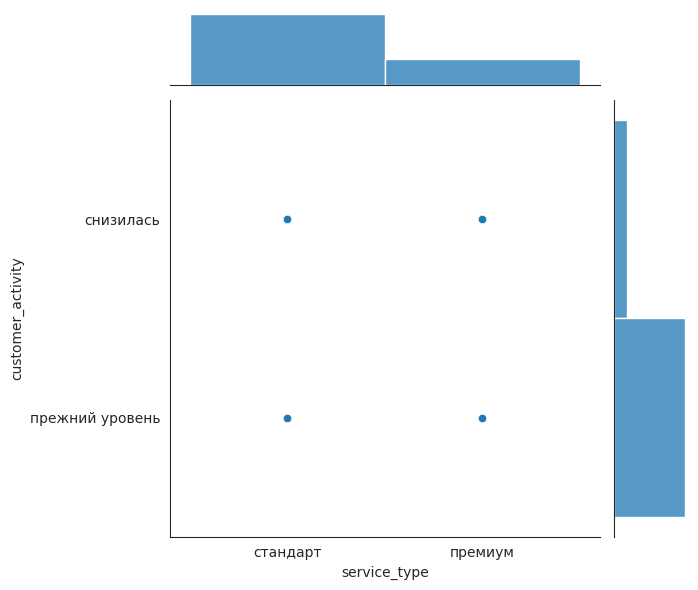

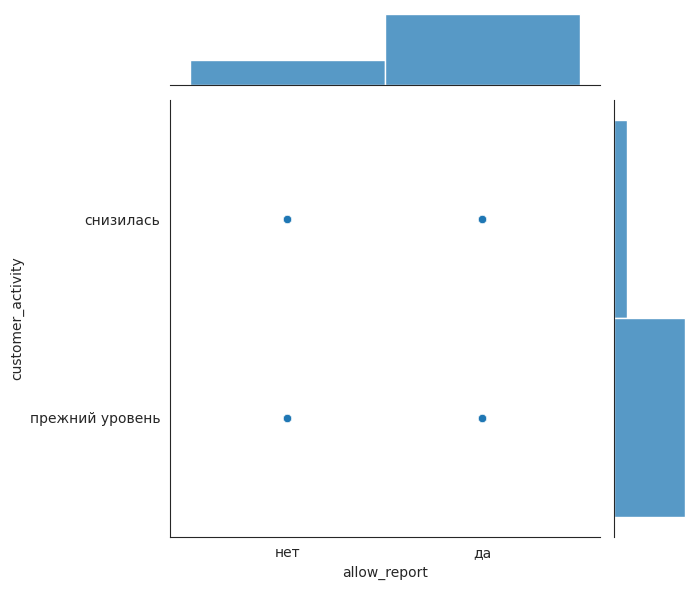

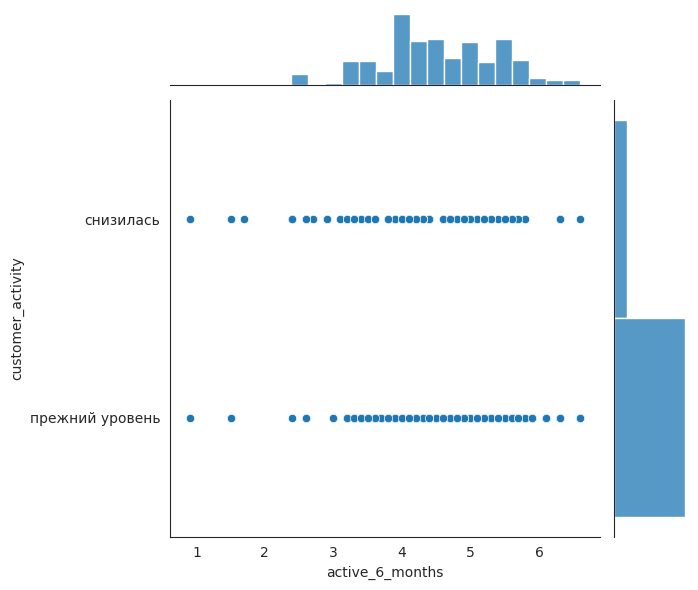

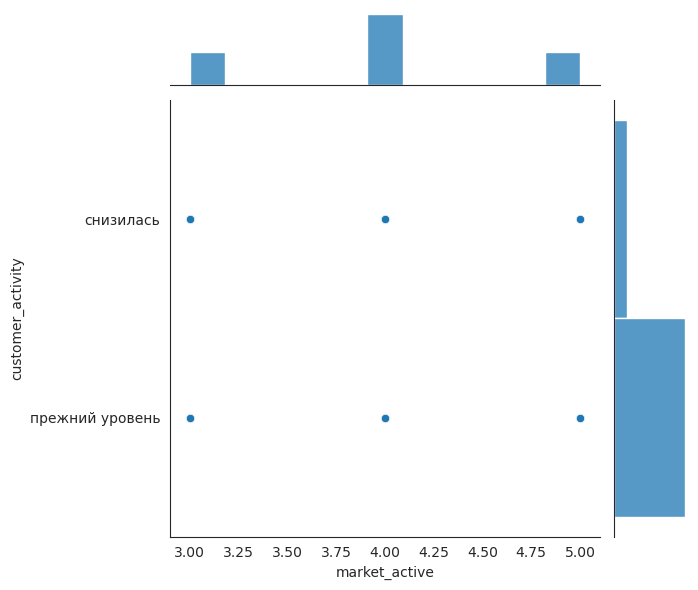

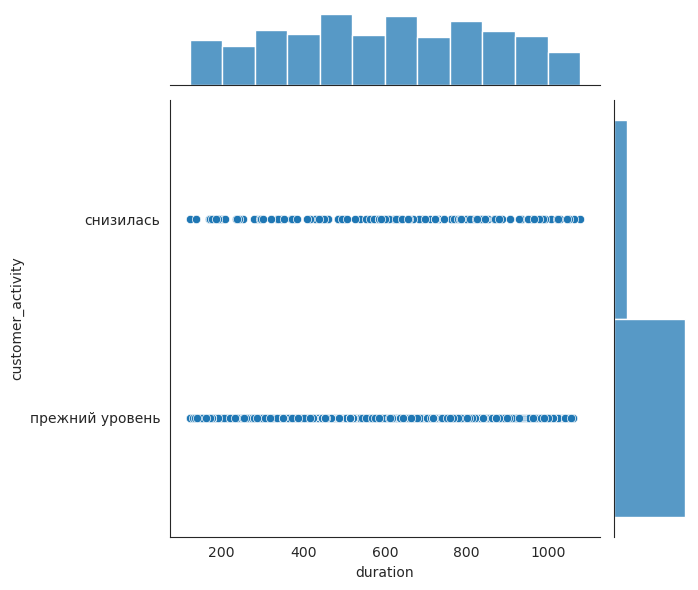

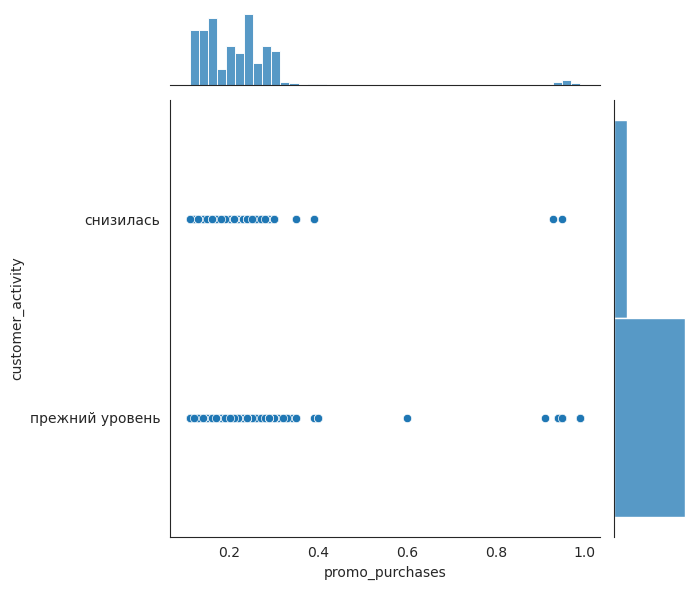

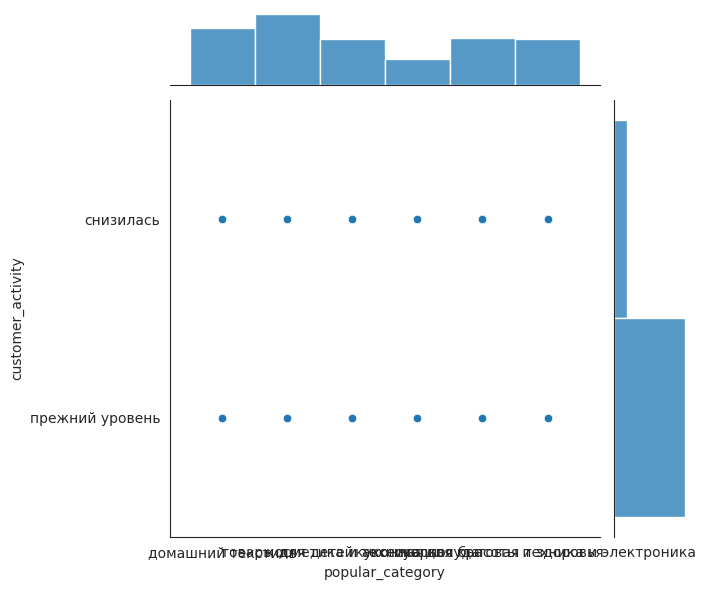

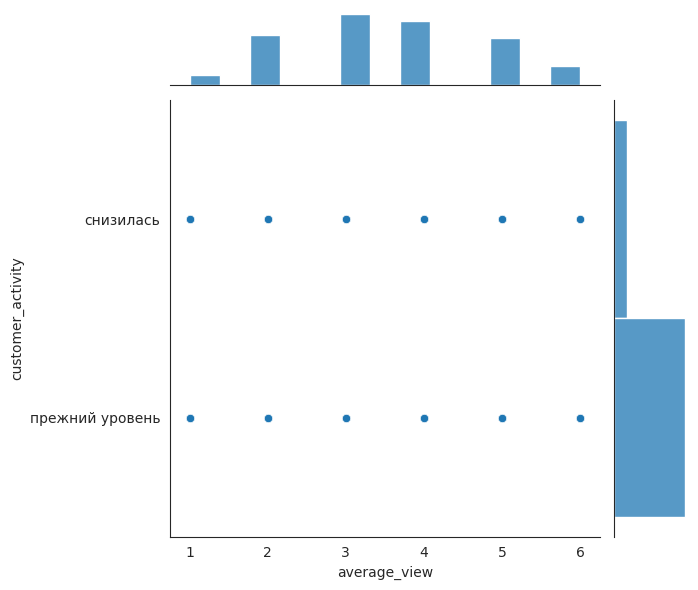

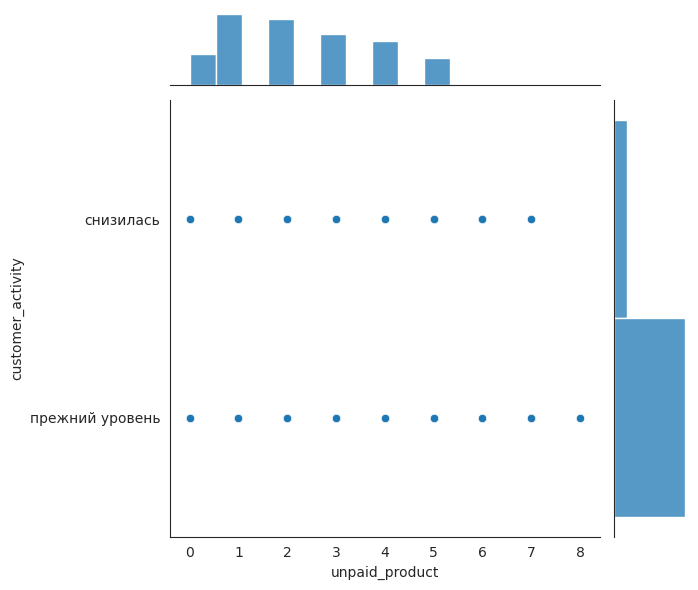

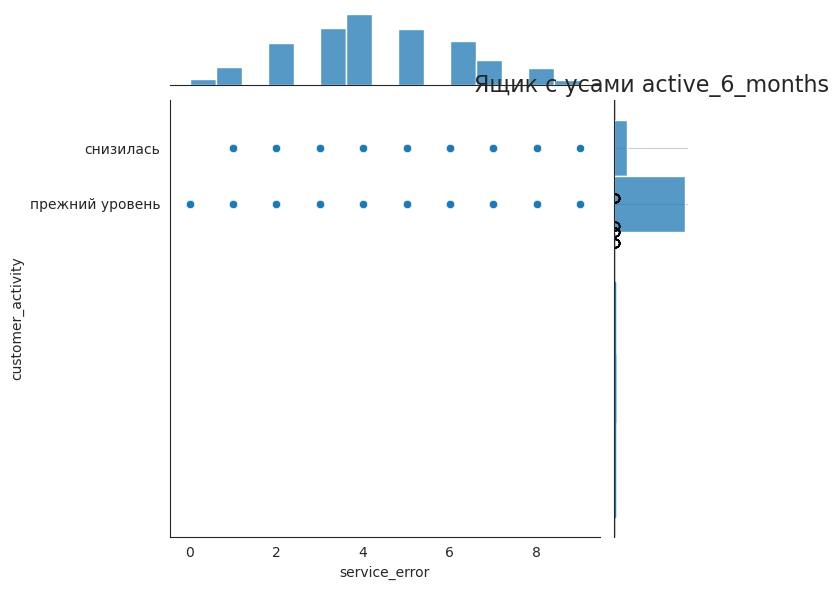

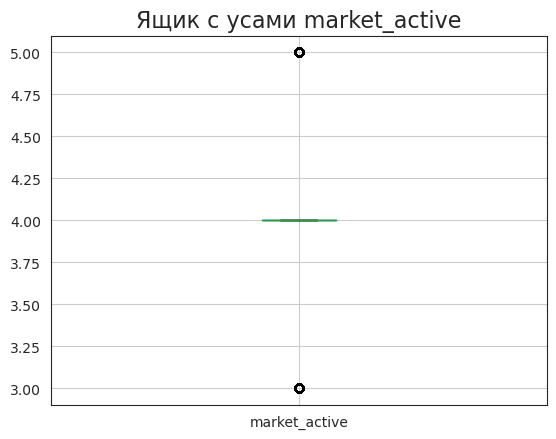

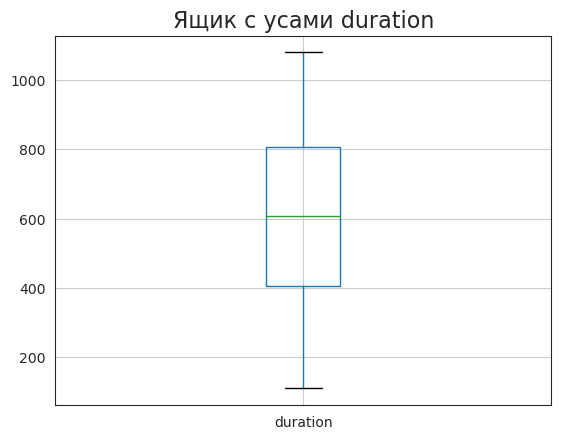

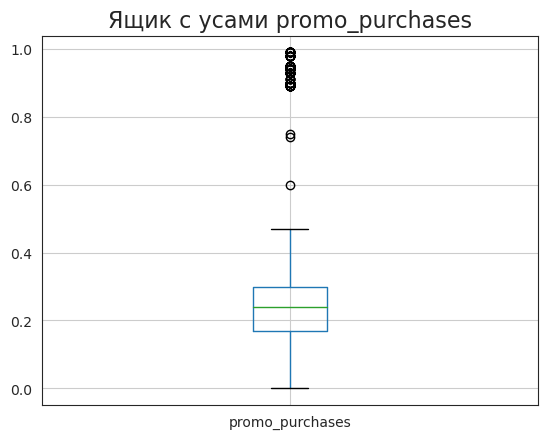

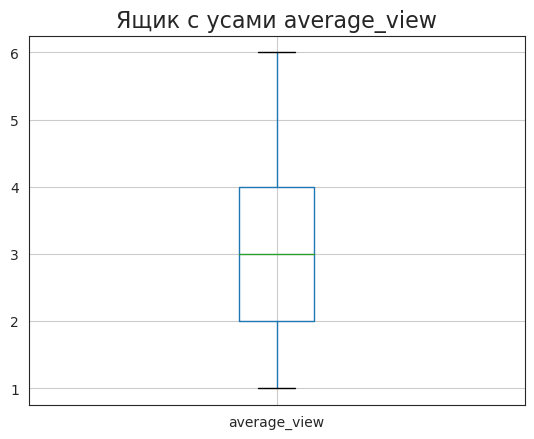

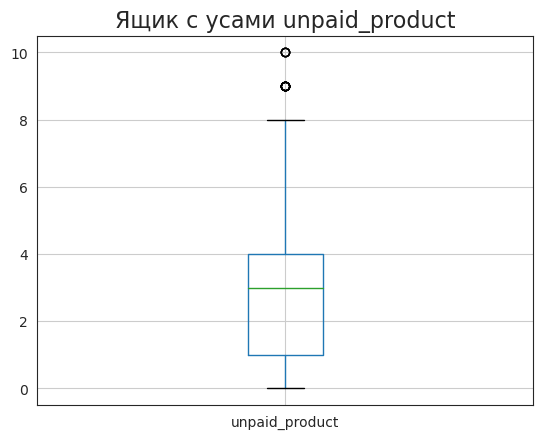

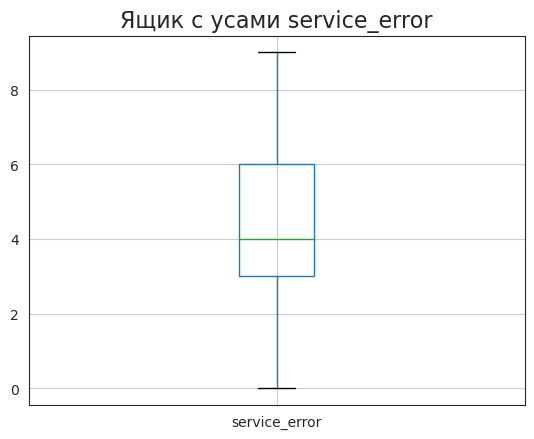

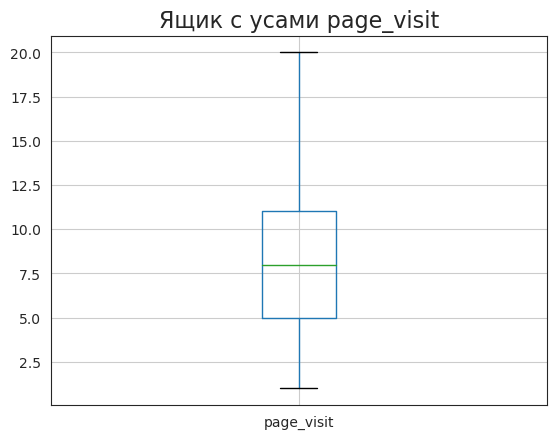

In [86]:
# построим boxplot для market_file¶
market_file_column_list=['active_6_months', 'market_active', 'duration', 'promo_purchases', 'average_view', 'unpaid_product', 'service_error', 'page_visit']

boxplot_painting(market_file, market_file_column_list)

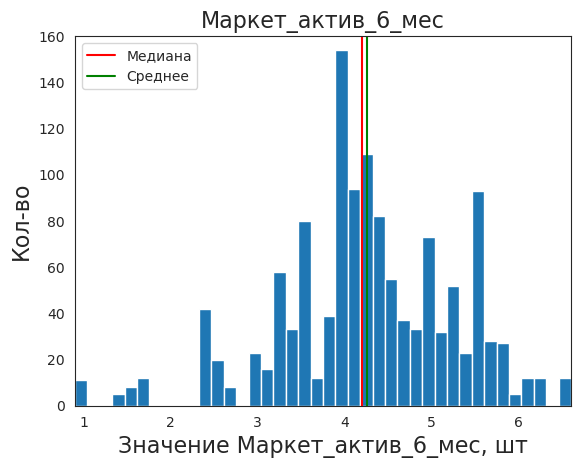

In [87]:
# построим гистограмму Жирности
names_active_6_months=['Маркет_актив_6_мес', 'Значение Маркет_актив_6_мес, шт', 'Кол-во']
y_lim_active_6_months=[0, 160]
hist_visio(market_file['active_6_months'], names_active_6_months, y_lim_active_6_months, 40)

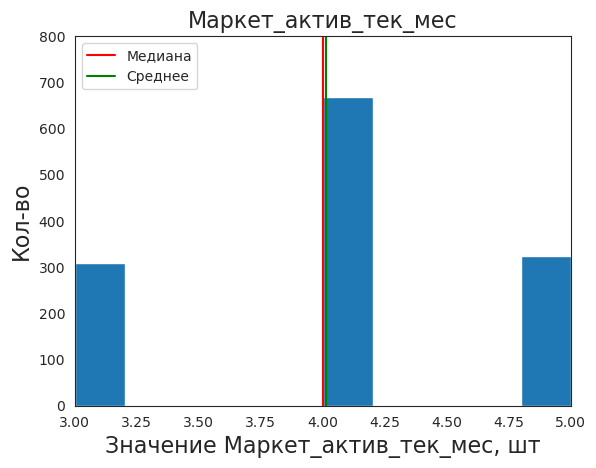

In [88]:
# построим гистограмму Маркетинговой активности
names_market_active=['Маркет_актив_тек_мес', 'Значение Маркет_актив_тек_мес, шт', 'Кол-во']
y_lim_market_active=[0, 800]
hist_visio(market_file['market_active'], names_market_active, y_lim_market_active, 10)

#### Судя по распредению частот и boxplot маркетинговой активности в текущем месяце, алгоритм распределения рекламы настроен  жестко и привязан к какому-то из параметров.
#### Возможно придется рассматривать как категориальный признак
Посмотрим дальше.

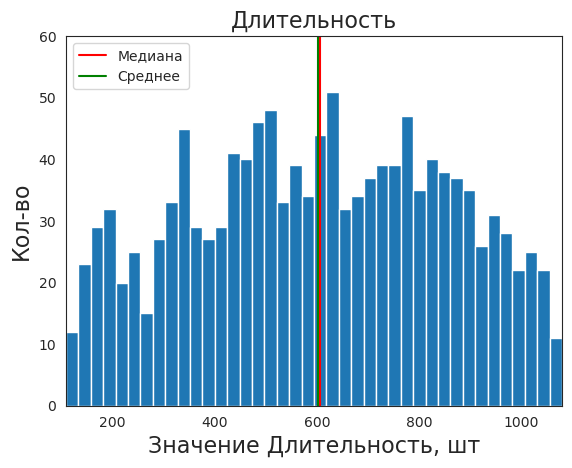

In [89]:
# построим гистограмму Длительности
names_market_duration=['Длительность', 'Значение Длительность, шт', 'Кол-во']
y_lim_market_duration=[0, 60]
hist_visio(market_file['duration'], names_market_duration, y_lim_market_duration, 40)

#### Наблюдается распределение, похожее на равномерное

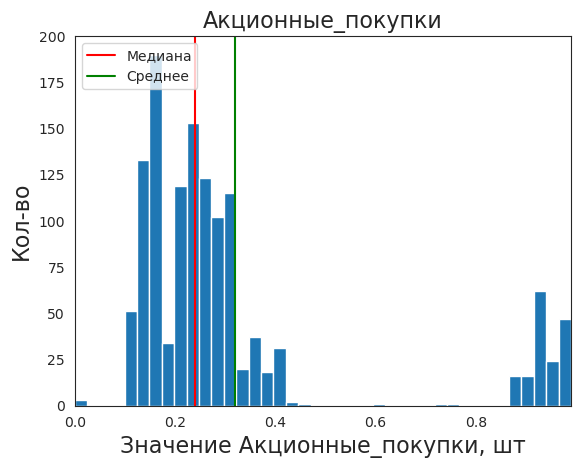

In [90]:
# построим гистограмму Акционные_покупки
names_promo_purchases=['Акционные_покупки', 'Значение Акционные_покупки, шт', 'Кол-во']
y_lim_promo_purchases=[0, 200]
hist_visio(market_file['promo_purchases'], names_promo_purchases, y_lim_promo_purchases, 40)

##### Наблюдаются два пика в колонке Акционные_покупки. 

Покупатели делятся на обычных и тех, кто покупает только по акции

Этих люей надо рассматривать по отдельности 

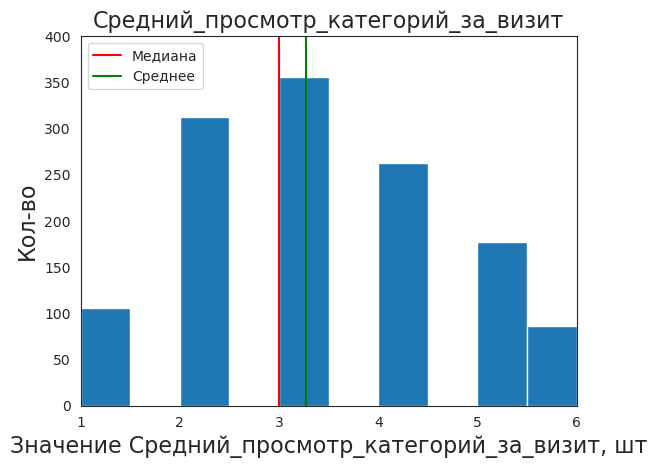

In [91]:
# построим гистограмму Средний_просмотр_категорий_за_визит
names_promo_average_view=['Средний_просмотр_категорий_за_визит', 'Значение Средний_просмотр_категорий_за_визит, шт', 'Кол-во']
y_lim_promo_average_view=[0, 400]
hist_visio(market_file['average_view'], names_promo_average_view, y_lim_promo_average_view, 10)

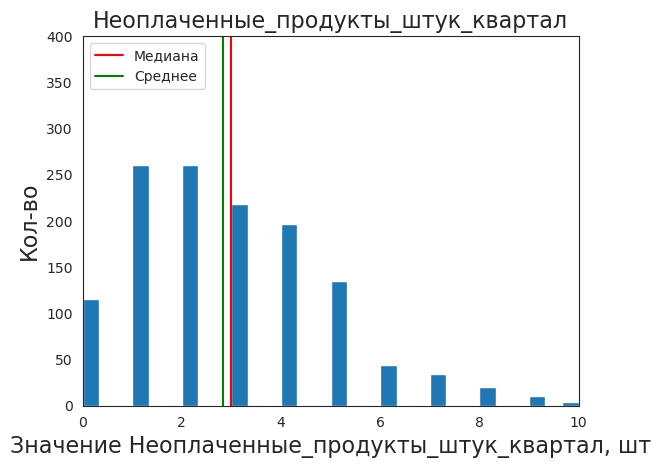

In [92]:
# построим гистограмму Неоплаченные_продукты_штук_квартал
names_promo_unpaid_product=['Неоплаченные_продукты_штук_квартал', 'Значение Неоплаченные_продукты_штук_квартал, шт', 'Кол-во']
y_lim_promo_unpaid_product=[0, 400]
hist_visio(market_file['unpaid_product'], names_promo_unpaid_product, y_lim_promo_unpaid_product, 30)

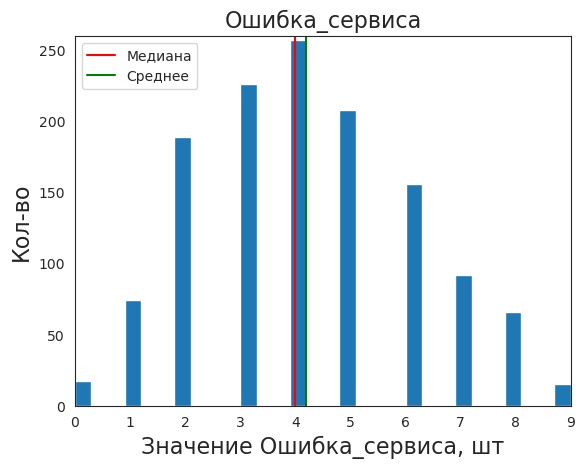

In [93]:
names_promo_service_error=['Ошибка_сервиса', 'Значение Ошибка_сервиса, шт', 'Кол-во']
y_lim_promo_service_error=[0, 260]
hist_visio(market_file['service_error'], names_promo_service_error, y_lim_promo_service_error, 30)

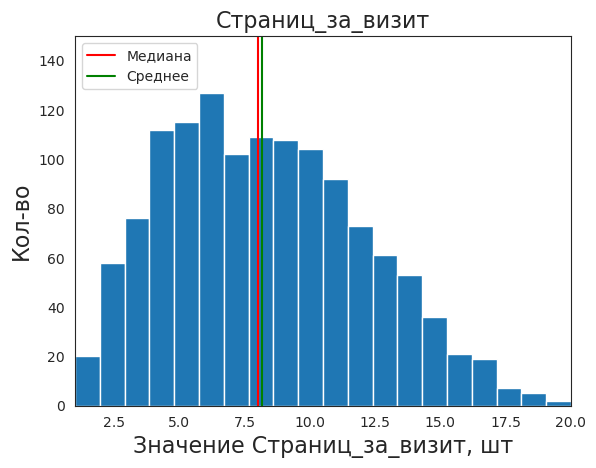

In [94]:
names_promo_page_visit=['Страниц_за_визит', 'Значение Страниц_за_визит, шт', 'Кол-во']
y_lim_promo_page_visit=[0, 150]
hist_visio(market_file['page_visit'], names_promo_page_visit, y_lim_promo_page_visit, 20)

- Среднемесячное значение маркетинговых коммуникаций компании в среднем 4, но присутствуют выбросы ниже минимального значения нижней границы
- Количество маркетинговых коммуникаций в текущем месяце представлены тремя значениями 3,4,5. Можно расценивать как категориальный признак
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев - наблюдается большое количество выбросов


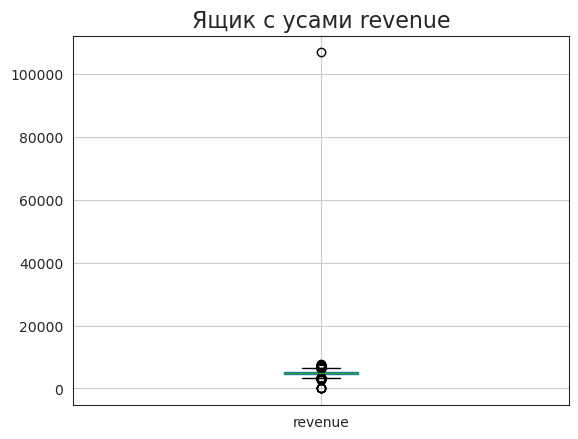

In [95]:
market_money_column_list=['revenue']
boxplot_painting(market_money, market_money_column_list)

Обратим внимание на подозрительное значение  более  100000. Сскорее всего это выброс. 

Выведем строки, соответствующие данному значению 

In [96]:
print(market_money.loc[market_money['revenue'] > 80000])

        id   money_period   revenue
98  215380  текущий_месяц  106862.2


#### Возможно какой-то клиент закупился на такую сумму, но он единственный. Поэтому удалим его, чтобы не портил статистику 

In [97]:
market_money.drop([98], inplace=True)

#### Проверим выручку ещё раз

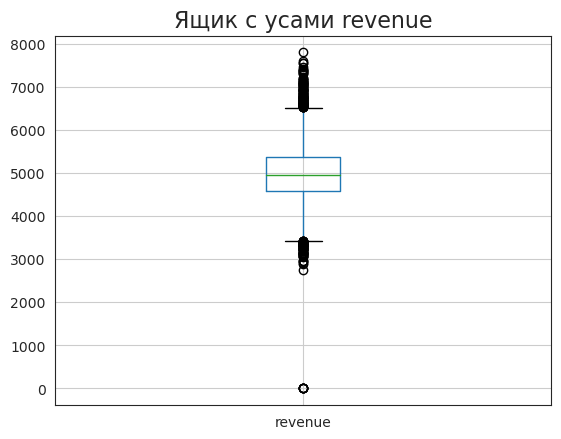

In [98]:
boxplot_painting(market_money, market_money_column_list)

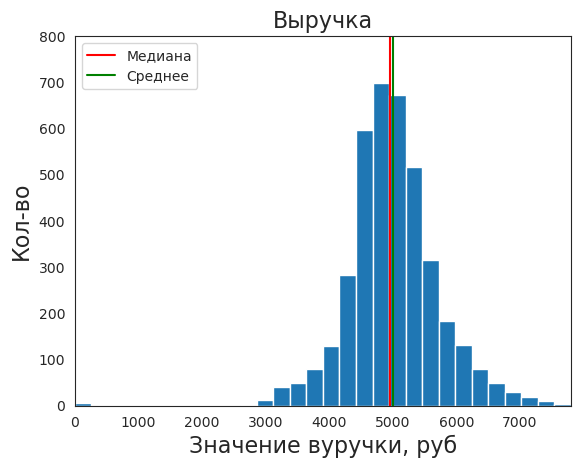

In [99]:
# построим гистограмму для выручки
names_market_money=['Выручка', 'Значение вуручки, руб', 'Кол-во']
y_lim_promo_market_money=[0, 800]
hist_visio(market_money['revenue'], names_market_money, y_lim_promo_market_money, 30)

 #### Построим boxplot для market_time

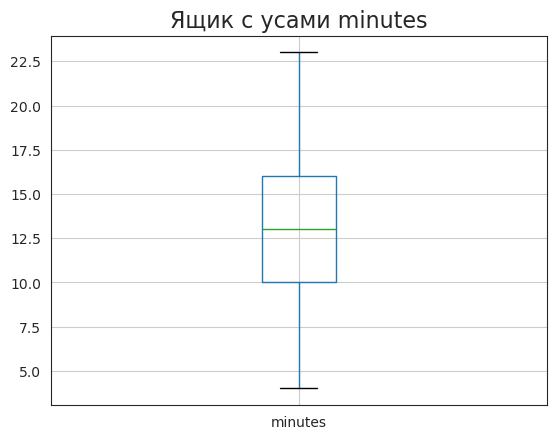

In [100]:
boxplot_painting(market_time, ['minutes'])

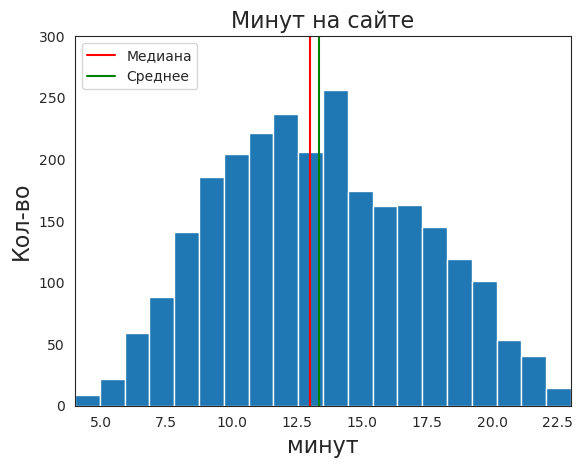

In [101]:
# построим гистограмму для выручки
names_minutes=['Минут на сайте', 'минут', 'Кол-во']
y_lim_promo_minutes=[0, 300]
hist_visio(market_time['minutes'], names_minutes, y_lim_promo_minutes, 20)

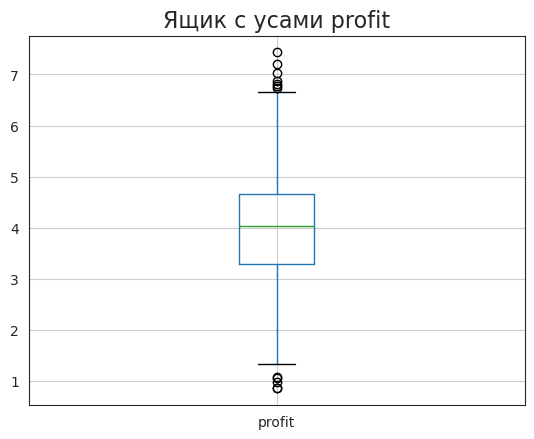

In [102]:
boxplot_painting(money, ['profit'])

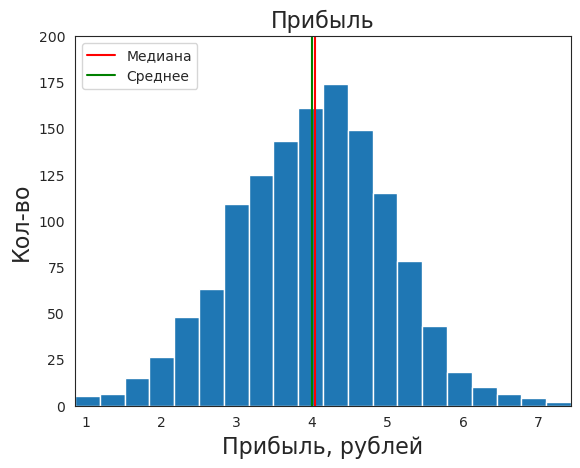

In [103]:
# построим гистограмму для Прибыль
names_profit=['Прибыль', 'Прибыль, рублей', 'Кол-во']
y_lim_promo_profit=[0, 200]
hist_visio(money['profit'], names_profit, y_lim_promo_profit, 20)

#### Рассмотрим категориальные признаки market_file

In [104]:
market_file['customer_activity'].value_counts().plot(kind='bar', title="Покупательская активность",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Покупательская активность'}, xlabel='Значение', ylabel='К-во'>

#### Покупательская активность - целевой признак. Наблюдается дисбаланс классов

In [105]:
market_file['service_type'].value_counts().plot(kind='bar', title="Тип сервиса",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Тип сервиса'}, xlabel='Значение', ylabel='К-во'>

#### Необходимо объединить 'стандарт' и 'стандартт'

In [106]:
market_file['service_type'] = market_file['service_type'].replace('стандартт', 'стандарт')
market_file['service_type'].value_counts().plot(kind='bar', title="Тип сервиса",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Тип сервиса'}, xlabel='Значение', ylabel='К-во'>

In [107]:
market_file['allow_report'].value_counts().plot(kind='bar', title="Рассылка сообщений",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Рассылка сообщений'}, xlabel='Значение', ylabel='К-во'>

In [108]:
market_file['popular_category'].value_counts().plot(kind='bar', title="Популярная категория",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Популярная категория'}, xlabel='Значение', ylabel='К-во'>

In [109]:
#Рассмотрим датафрейм market_money
market_money['money_period'].value_counts().plot(kind='bar', title="Период",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Период'}, xlabel='Значение', ylabel='К-во'>

In [110]:
### market_time

market_time['time_period'].value_counts().plot(kind='bar', title="Период",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Период'}, xlabel='Значение', ylabel='К-во'>

#### Наблюдается орфографическая ошибка. Исправим её

In [111]:
market_time['time_period'] = market_time['time_period'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [112]:
# поскольку были объединены некоторые значения, проверим ещё раз дубли
print(market_file.duplicated().sum())
print('--------------')
print(market_money.duplicated().sum())
print('--------------')
print(market_time.duplicated().sum())
print('--------------')
print(money.duplicated().sum())

0
--------------
0
--------------
0
--------------
0


#### Для каждого признака построим графика совместной плотности распределения 

In [113]:
signs=market_file.columns
target='customer_activity'

In [114]:
for value in range(2,11):
    sns.jointplot(x=market_file[signs[value]], y=market_file[target], data=market_file)

#### Выводы:

- Снижение покупалельской активно наблюдается в типе сервиса "Стандарт"
- Также видно, что покупательская активность снижается у тех людей, которым разрешена рассылка. Вероятно рассылка слишком назойливая
- Больше всего отказов наблюдается у людей, котором присылылось около 4-х предложений за последние 6 месяцев и в текущем месяце
- Снижение активности начинает прослеживаться через 200 дней после регистрации
- Больше всего снижение наблюдается в категории "Товары для детей". Если учитывать, что активность снижается через 200 дней, вероятно это связано, что дети растут. Для прогноза оттока, лучше исключить категории с детскими товарами, поскольку такие пользователь уйдут в любом случае. Но можно этого не делать
- Больше всего снижается активность после просмотра трех категорий товаров. Сразу не понятно в чем причина.
- Наибольшее снижение активности наблюдается при 1-2 неоплаченных продуктов за квартал. Верояно связано с техническими недобствами на сайте.


#### Объединение таблиц

In [115]:
# Разобъем таблицы market_time_pre и market_time по периодам 
                               
market_money_pre=market_money.query('money_period == "предыдущий_месяц"')
market_money_prepre=market_money.query('money_period == "препредыдущий_месяц"')
market_money_tek=market_money.query('money_period == "текущий_месяц"')

full_market_money = pd.merge(market_money_prepre, market_money_pre, on='id')
full_market_money = full_market_money.merge(market_money_tek, on='id', how='outer')


market_time_tek=market_time.query('time_period == "текущий_месяц"')
market_time_pre=market_time.query('time_period == "предыдущий_месяц"')

full_market_time = pd.merge(market_time_pre, market_time_tek, on='id')

In [116]:
df_full = pd.merge(market_file, full_market_money, on='id')
df_full = df_full.merge(full_market_time, on='id', how='outer')
#df_full.drop('id', axis=1, inplace=True)
df_full.head()

,id,customer_activity,service_type,allow_report,active_6_months,market_active,duration,promo_purchases,popular_category,average_view,...,money_period_x,revenue_x,money_period_y,revenue_y,money_period,revenue,time_period_x,minutes_x,time_period_y,minutes_y
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,...,препредыдущий_месяц,0.0,предыдущий_месяц,0.0,текущий_месяц,3293.1,предыдущий_месяц,13,текущий_месяц,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,препредыдущий_месяц,4472.0,предыдущий_месяц,5216.0,текущий_месяц,4971.6,предыдущий_месяц,12,текущий_месяц,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,препредыдущий_месяц,4826.0,предыдущий_месяц,5457.5,текущий_месяц,5058.4,предыдущий_месяц,8,текущий_месяц,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,препредыдущий_месяц,4793.0,предыдущий_месяц,6158.0,текущий_месяц,6610.4,предыдущий_месяц,11,текущий_месяц,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,препредыдущий_месяц,4594.0,предыдущий_месяц,5807.5,текущий_месяц,5872.5,предыдущий_месяц,8,текущий_месяц,11


In [117]:
df_full=df_full[(df_full['revenue_x']>0) | (df_full['revenue_y']>0) | (df_full['revenue']>0)]
df_full.head()

,id,customer_activity,service_type,allow_report,active_6_months,market_active,duration,promo_purchases,popular_category,average_view,...,money_period_x,revenue_x,money_period_y,revenue_y,money_period,revenue,time_period_x,minutes_x,time_period_y,minutes_y
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,...,препредыдущий_месяц,0.0,предыдущий_месяц,0.0,текущий_месяц,3293.1,предыдущий_месяц,13,текущий_месяц,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,препредыдущий_месяц,4472.0,предыдущий_месяц,5216.0,текущий_месяц,4971.6,предыдущий_месяц,12,текущий_месяц,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,препредыдущий_месяц,4826.0,предыдущий_месяц,5457.5,текущий_месяц,5058.4,предыдущий_месяц,8,текущий_месяц,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,препредыдущий_месяц,4793.0,предыдущий_месяц,6158.0,текущий_месяц,6610.4,предыдущий_месяц,11,текущий_месяц,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,препредыдущий_месяц,4594.0,предыдущий_месяц,5807.5,текущий_месяц,5872.5,предыдущий_месяц,8,текущий_месяц,11


#### Выводы:

- Таблицы market_time_pre и market_time разделены по периодам. Получилась единая таблица, по которой можно прогнозировать ооток клиентов 


#### Корреляционный анализ

In [118]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [119]:
#df_full.drop('id', axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(df_full.phik_matrix() , annot=True, fmt='.2f')


interval columns not set, guessing: ['id', 'active_6_months', 'market_active', 'duration', 'promo_purchases', 'average_view', 'unpaid_product', 'service_error', 'page_visit', 'revenue_x', 'revenue_y', 'revenue', 'minutes_x', 'minutes_y']


<AxesSubplot:>

In [120]:
# последуем рекомендациям и Warninga и удалим колонки
df_full.drop('money_period', axis=1, inplace=True)
df_full.drop('money_period_x', axis=1, inplace=True)
df_full.drop('money_period_y', axis=1, inplace=True)
df_full.drop('time_period_x', axis=1, inplace=True)
df_full.drop('time_period_y', axis=1, inplace=True)

In [121]:
fig, ax = plt.subplots(figsize=(12, 12))
# Визуализация корреляционной матрицы как тепловой карты
sns.set_style("white")
sns.heatmap(df_full.phik_matrix() , annot=True, fmt='.2f')

interval columns not set, guessing: ['id', 'active_6_months', 'market_active', 'duration', 'promo_purchases', 'average_view', 'unpaid_product', 'service_error', 'page_visit', 'revenue_x', 'revenue_y', 'revenue', 'minutes_x', 'minutes_y']


<AxesSubplot:>

#### Выводы:


#### В целом есть высокие значения корреляции, но мультиколлинеарных признаков нет

#### Будем строить модель как есть

In [122]:
# код ревьюера
df_full.head(2)

,id,customer_activity,service_type,allow_report,active_6_months,market_active,duration,promo_purchases,popular_category,average_view,unpaid_product,service_error,page_visit,revenue_x,revenue_y,revenue,minutes_x,minutes_y
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10


#### Использование пайплайнов


In [123]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['customer_activity','id'], axis=1),
    df_full['customer_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['customer_activity'])

X_train.shape, X_test.shape

((975, 16), (325, 16))

In [124]:
#ohe_columns = ['service_type', 'allow_report', 'popular_category', 'money_period_x', 'money_period_y', 'money_period', 'time_period_x', 'time_period_y']
ohe_columns=X_train.select_dtypes(include=['object']).columns

#num_columns = ['active_6_months', 'promo_purchases','market_active', 'duration', 'average_view', 'unpaid_product', 'service_error', 'revenue_x','revenue_y','revenue', 'minutes_x', 'minutes_y', 'page_visit']

num_columns=X_train.select_dtypes(include=[np.number]).columns

In [125]:
#создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
    ]
)

In [126]:

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 6),
        'models__max_features': range(1,6),
        # указываем список методов масштабирования  
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C':  [1, 10, 100, 1000],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]



In [127]:
#!pip install -U scikit-learn -q

In [136]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных

labelencoder = LabelEncoder()

# Преобразование целевого признака
y_test_encoded = labelencoder.fit_transform(y_test)


#y_test_pred = randomized_search.predict_proba(X_test)
#y_test_pred_encoder=labelencoder.fit_transform(y_test_pred[:, 1])


probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test_encoded, probabilities_one))


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['service_type', 'allow_report', 'popular_category'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['active_6_months', 'market_active', 'duration', 'promo_purchases',
       'average

/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/home/vladislav/anaconda3/lib/python3.9/site-packages/sklearn/u

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 В целом по коду обучения все замечательно. Рекомендую доработать с порядковым кодированием.
</div> 

<div class="alert alert-block alert-danger">
<h2> <s>Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
    
Ошибка в последней строке:
    
` {roc_auc_score(y_test_encoded, y_test_pred_encoder)}')`
     
roc_auc для тестовой выборки нужно считать по вероятностям классов. 
    
`probabilities = model.predict_proba(features)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one))`

Самое подробное объяснение метрики, что я видел на русском языке, можно посмотреть здесь: https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ 

А внутри кросс-валидации мы просто указываем метрику ROC_AUC и там никаких вероятностей нам не нужно. Так как эта метрика не дифференцируема на всем промежутке (кажется, разрыв в нуле), то там разработчики кросс-валидации хитро меняют ее на эквивалент Gini, так как Gini = 2 ×AUC_ROC – 1 (можно почитать по ссылке выше).
</div>



#### Лучшая модель выбрана -  SVC(C=1, random_state=42).  Метрика на тестовой выборке равна 0.87

#### Шаг 7. Анализ важности признаков

- 7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
- 7.2 Сделайте выводы о значимости признаков:
      какие признаки мало значимы для модели;
      какие признаки сильнее всего влияют на целевой признак;
      как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [129]:
!pip install shap -q

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Нужно раскомментировать и перенести в начало проекта.
    
`!pip install shap -q`
       
</div> 
  


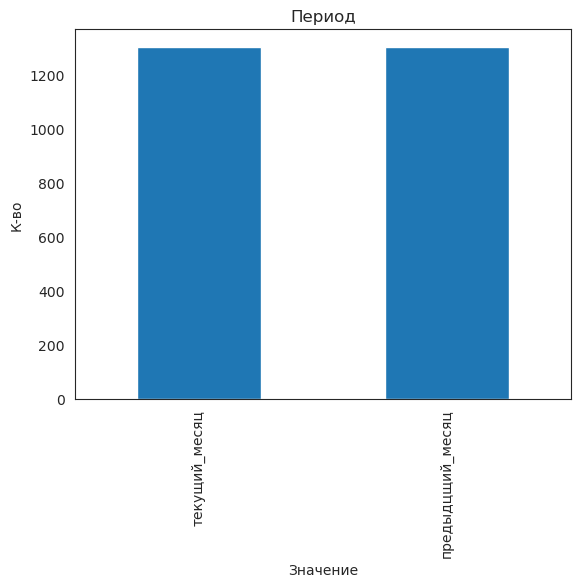

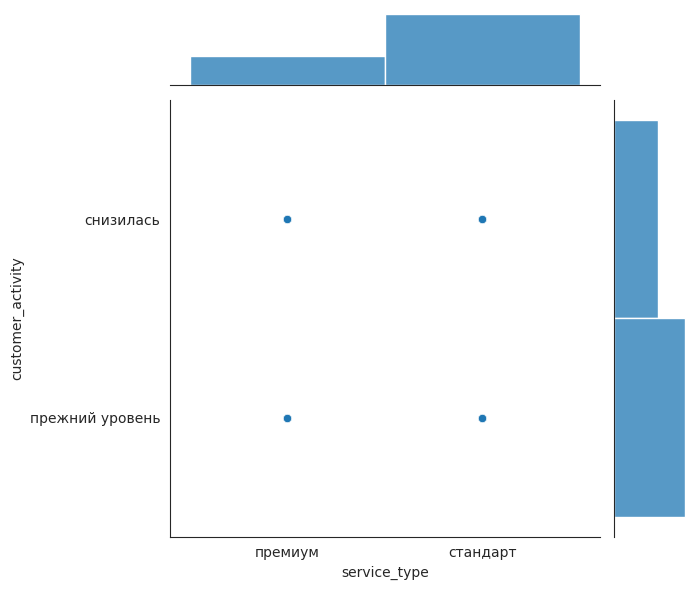

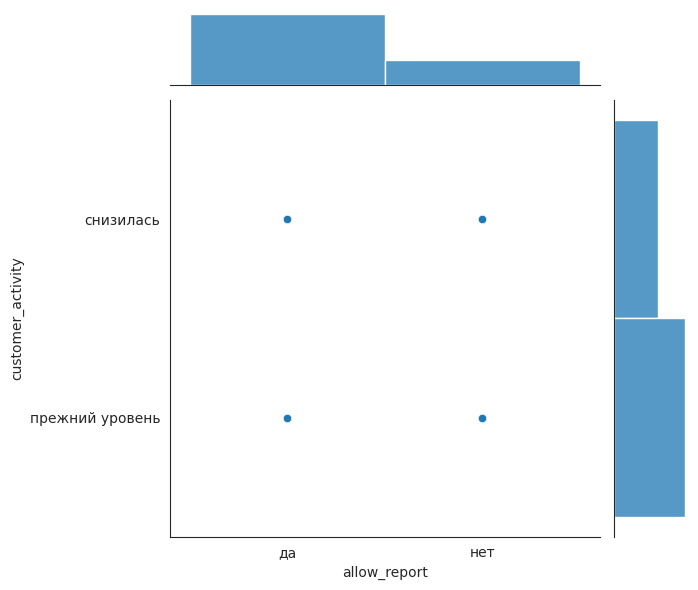

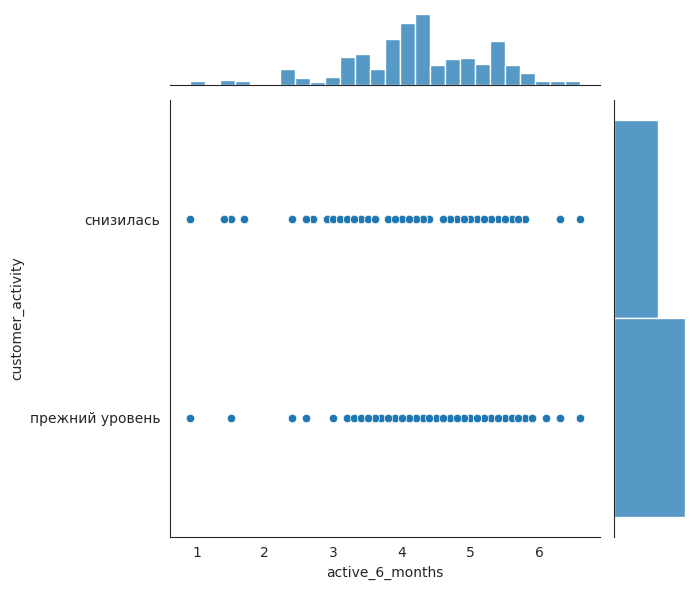

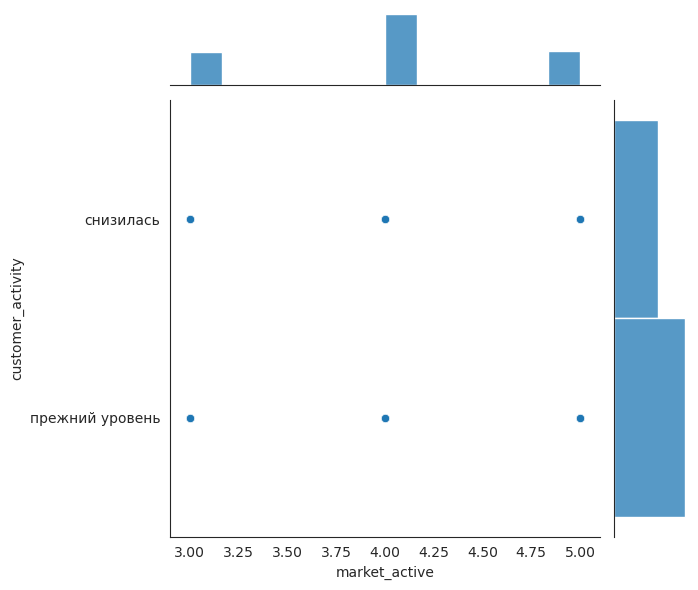

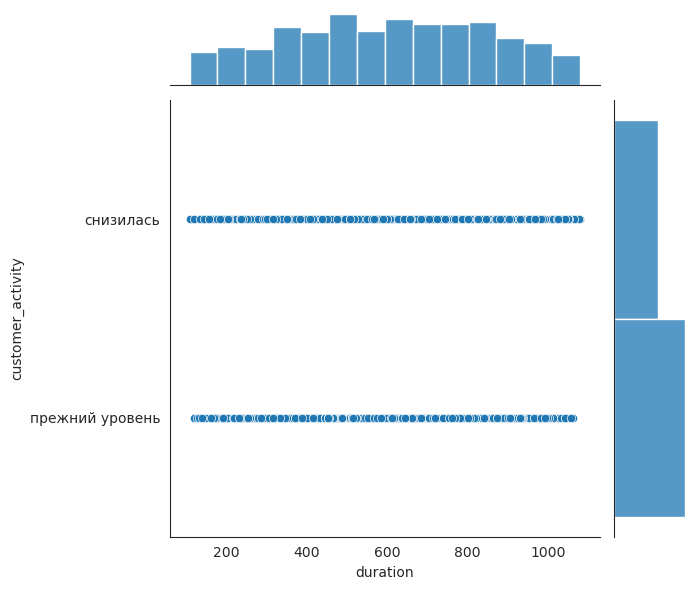

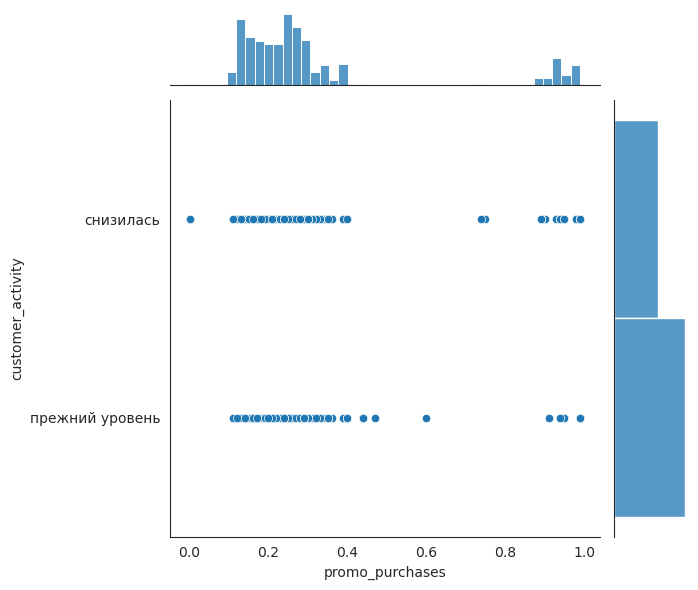

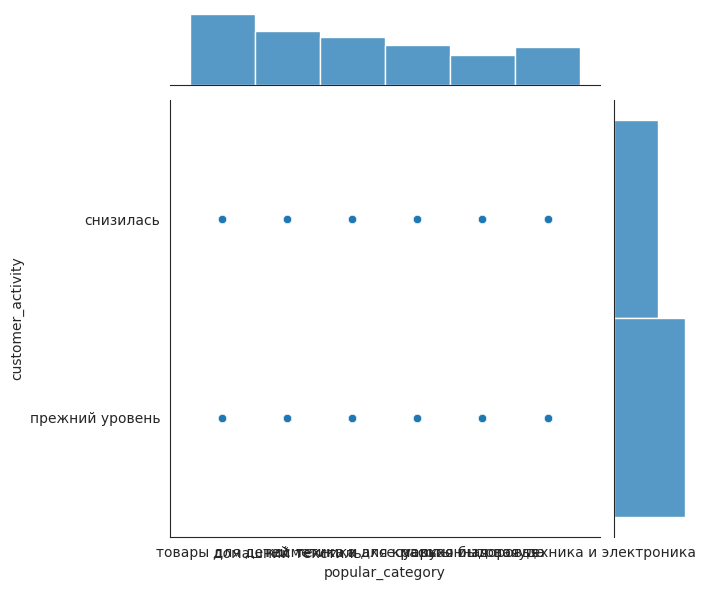

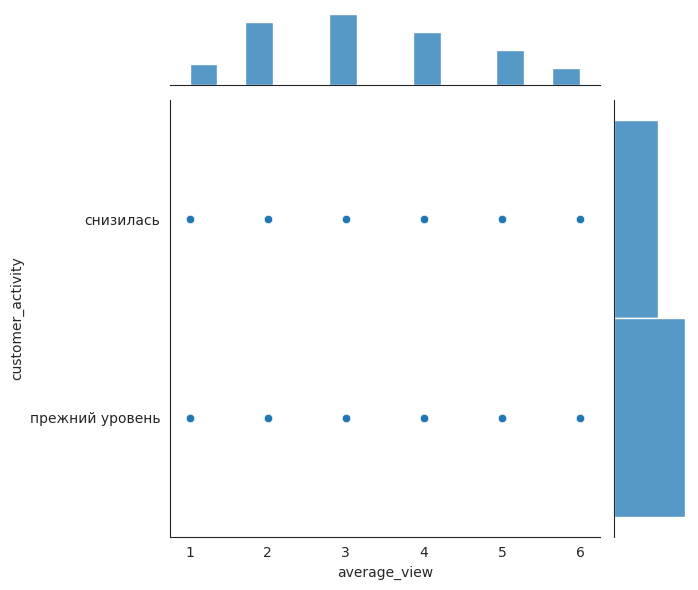

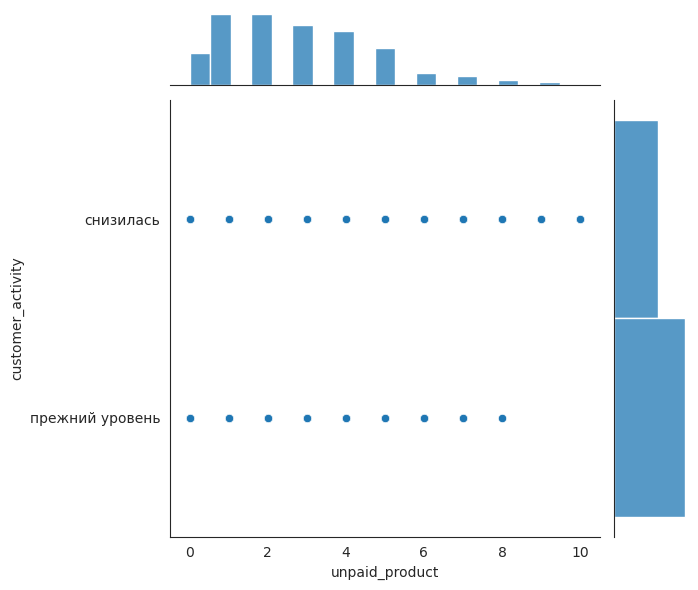

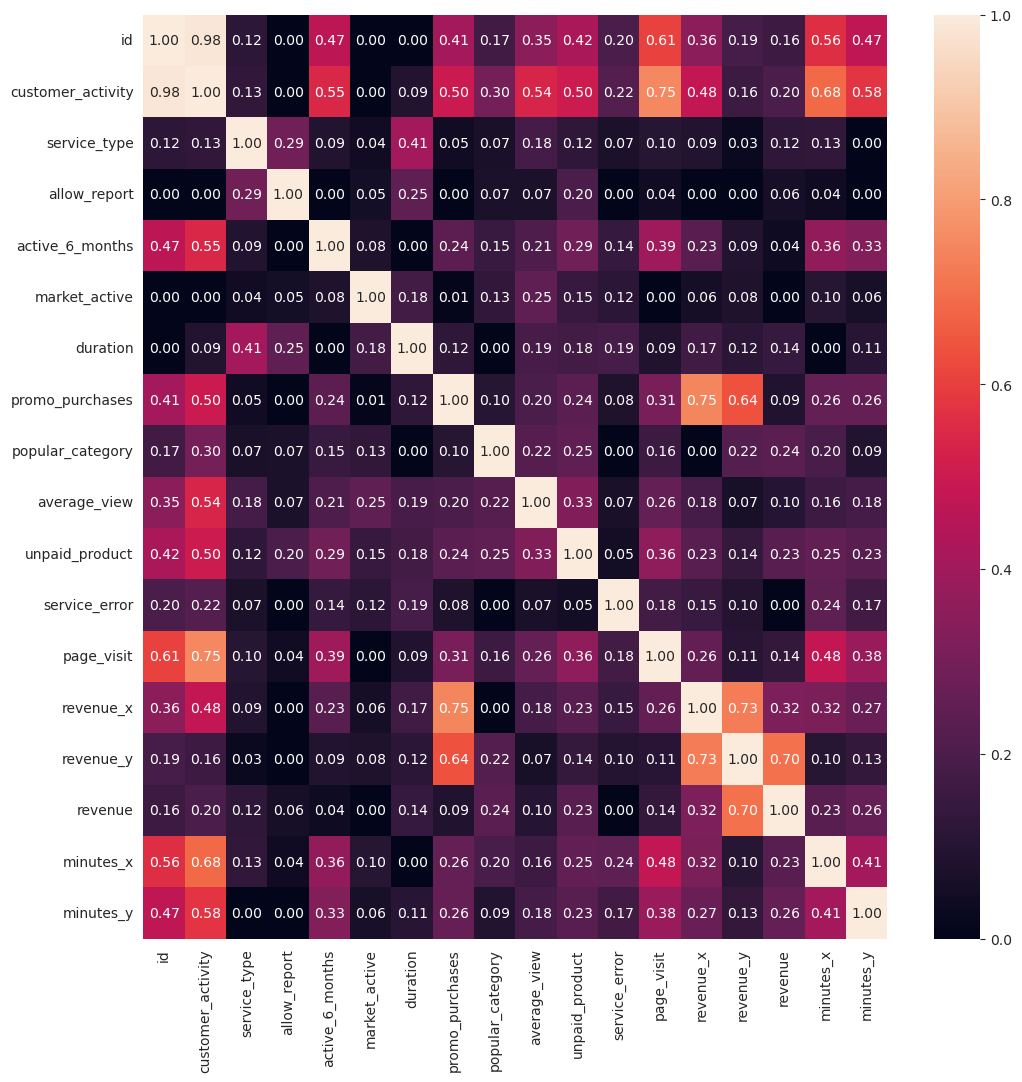

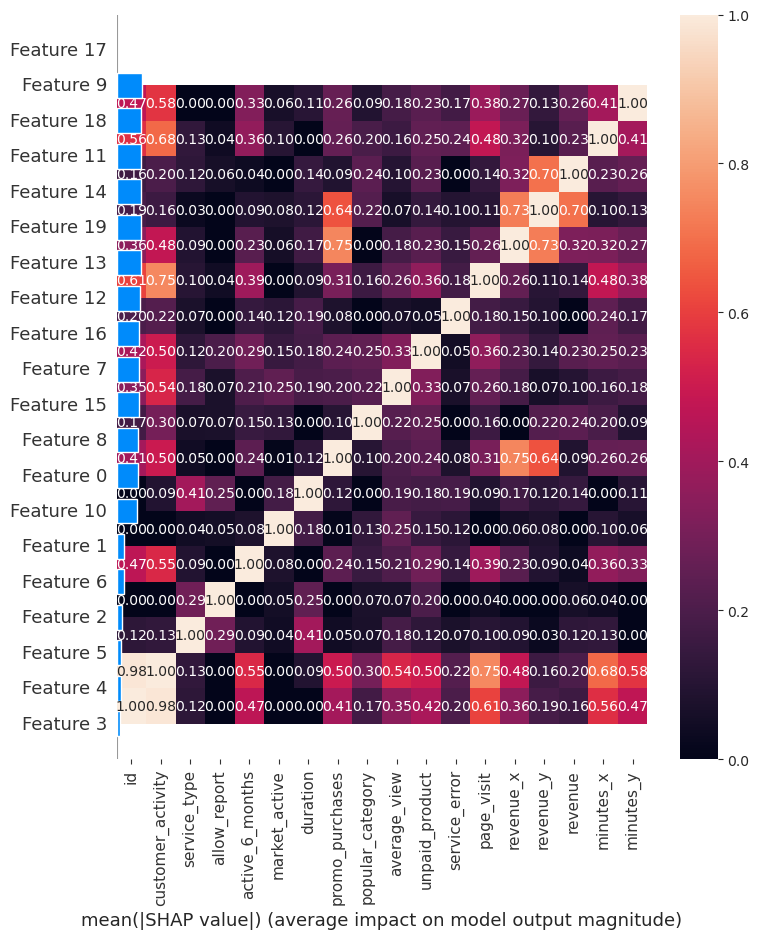

In [130]:
# примененеие preprocessor 
X_encoded = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
# применение лучшей модели 
best_model = randomized_search.best_estimator_['models'].fit(X_encoded, y_train)
explainer = shap.PermutationExplainer(best_model, X_encoded)
# построение графика

shap.summary_plot(X_encoded, plot_type='bar')

In [131]:
for i in [9,18,11,14,19,13,12,16,7,15,8,0,10,1,6,2,5,4,3]:
    print(randomized_search.best_estimator_[:-1].get_feature_names_out()[i])

num__duration
num__minutes_x
num__average_view
num__page_visit
num__minutes_y
num__service_error
num__unpaid_product
num__revenue_y
num__active_6_months
num__revenue_x
num__market_active
ohe__service_type_стандарт
num__promo_purchases
ohe__allow_report_нет
ohe__popular_category_товары для детей
ohe__popular_category_косметика и аксесуары
ohe__popular_category_техника для красоты и здоровья
ohe__popular_category_мелкая бытовая техника и электроника
ohe__popular_category_кухонная посуда


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также импорты нужно перенести в начало проекта.
    
****
    
По названиям - лучше попробовать их прикрутить, используя код из тренажера. Если категории товаров выше в модели поместить в порядковое кодирвоание, то вывод названий фичей должен заработать.
    
```
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
 
explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)
 
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
 
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
 
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=22))
shap.plots.beeswarm(shap_values, max_display=22) 

    
```
    
Однако это вполне себе выход (хотя и не очень красивый) − выводить список столбцов и сопоставлять с ними.
    
***
    
Встречал еще вариант, когда список столбцов прописывали от руки, а затем подавали в Shap
    
```
model = random_search.best_estimator_['models']
transformer = random_search.best_estimator_['preprocessor']
col_list = ['тип_сервиса', 'разрешить_сообщать', 'длительность', 'акционные_покупки', 'выручка_препредыдущий_месяц', 
            'выручка_предыдущий_месяц', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит',
            'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит','предыдущий_месяц_минут', 
            'популярная_категория']
X=pd.DataFrame(transformer.transform(X_train), 
               columns = col_list)
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

shap.plots.beeswarm(shap_values) 

    
```
       
</div> 
  


#### Признаки, которые влияют на целевой признак больше всего:

- num__duration - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте. 
- num__minutes_x - значение времени, проведённого на сайте в предыдущем месяце
- num__average_view - средний_просмотр_категорий_за_визит
- num__page_visit - количество просмотренных страниц за визит
- num__minutes_y - значение времени, проведённого на сайте в текущем месяце
- num__service_error - ошибки на сайте
- num__unpaid_product - количество неоплаченных продуктов
- num__revenue_y - выручка в предыдущий месяц
- num__active_6_months - маркетинговая активность за последние 6 месяцев 
- num__revenue_x - выручка в препредыдущий месяц
- num__market_active -маркетинговая активность в текущем месяце
- ohe__service_type_стандарт - тип клиентов


#### Не влияют на модель:

Все признаки, связанные с Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- ohe__popular_category_товары для детей
- ohe__popular_category_косметика и аксесуары
- ohe__popular_category_техника для красоты и здоровья
- ohe__popular_category_мелкая бытовая техника и электроника
- ohe__popular_category_кухонная посуда

#### Для принятия правильных бизнес решений необходимо настраивать промо рассылку тем клиентам, которые долше всего проводят времени на сайте


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
После доработки с объединением таблиц нужно будет перепроверить результаты моделей и важность фичей в Shap.

</div>

#### Шаг 8. Сегментация покупателей

- 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
- 8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.
- 8.3 Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.

In [132]:
# выполним сегментацию пользователей
df_full= df_full.merge(money, on='id')


df_full= df_full.merge(money, on='id')

X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['customer_activity'], axis=1),
    df_full['customer_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['customer_activity'])


X_test['probability_decrease']=randomized_search.predict_proba(X_test)[:,0]
X_test = X_test.sort_values('probability_decrease', ascending=False)

sns.scatterplot(x='profit_x', y='probability_decrease', data=X_test)


<AxesSubplot:xlabel='profit_x', ylabel='probability_decrease'>

#### На графике вероятность отказа от прибыли клиента видно густое облако точек выше верояности 0.7. Ниже вероятности 0.7 точки разрежены.

Следовательно можно сделать предположение, что граница вероятности порога снижения активности проходит по хначению 0.7 



<div class="alert alert-success">
<h2> Комментарий ревьюера #3 <a class="tocSkip"> </h2>

👍 Согласен.
</div>

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2><s> Комментарий ревьюера #2 <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь по заданию проекта принципиально важно использовать результаты моделирования. Иными словами, важно воспользоваться не метками классов (прежняя активность, снизилась), а вероятностями классов.
    
`8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.`
    
Ниже в желтом комментарии описал, что от нас ожидается в этой части исследования.

</div>



#### Исходя из моделирования выберем клиентов вероятностию снижения активности более 0.7


In [133]:
# найдём огорченных покупателей

df_full['probability_decrease']=randomized_search.predict_proba(df_full)[:,0]

disappointed_customers=df_full[df_full['probability_decrease']>=0.7]

disappointed_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 2 to 1298
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    898 non-null    int64  
 1   customer_activity     898 non-null    object 
 2   service_type          898 non-null    object 
 3   allow_report          898 non-null    object 
 4   active_6_months       898 non-null    float64
 5   market_active         898 non-null    int64  
 6   duration              898 non-null    int64  
 7   promo_purchases       898 non-null    float64
 8   popular_category      898 non-null    object 
 9   average_view          898 non-null    int64  
 10  unpaid_product        898 non-null    int64  
 11  service_error         898 non-null    int64  
 12  page_visit            898 non-null    int64  
 13  revenue_x             898 non-null    float64
 14  revenue_y             898 non-null    float64
 15  revenue               

#### Попробуем понять в чем причина их ухода

In [134]:
# Постро
disappointed_customers['popular_category'].value_counts().plot(kind='bar', title="Покупательская активность",xlabel="Значение", ylabel="К-во")

<AxesSubplot:title={'center':'Покупательская активность'}, xlabel='Значение', ylabel='К-во'>

In [135]:
signs=disappointed_customers.columns
target='customer_activity'

for value in range(2,12):
    sns.jointplot(x=disappointed_customers[signs[value]], y=disappointed_customers[target], data=disappointed_customers)


##### У постоянных покупателей снижается покупательская активность потому что:

- дети растут и товары для детей перестают покупать
- рассылается слишком назойливой нецелевой рекламы. Необходимо уменьшать маркетинговую активность среди постоянных покупателей. Они сами знают что им надо. Возможно имеет смысл проанализироать потребности постоянных покупателей и предлагать только то, что им нужно. 
- покупательская активность снижается после 400 дней с момента регистрации. Возможно это связано с тем, что сервис надоедает клиентам
- снижение активности наблюдается среди тех, кто не купил отложенный товар. Необходиом проверить цены и удобство работы функционала покупки товаров.
- ошибки на сайте также влияют нга отток клиентов. Необходимо продумать механизм поощрения тех клиентов, которые столкнулись с ошибками сервиса

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

* Все-таки, дети (в т.ч. чужие) растут несколько медленнее, чем за три месяца, так что здесь вряд ли будет какой-то эффект на востребованность товаров для детей. Да и сама категория постоянных клиентов за среднее время подростания детей существенно трансформируется.
    
* «рассылается слишком назойливой нецелевой рекламы. Необходимо уменьшать маркетинговую активность среди постоянных покупателей. Они сами знают что им надо. Возможно имеет смысл проанализироать потребности постоянных покупателей и предлагать только то, что им нужно.» - не совсем ясно, на каких данных основывается этот вывод.
    
* «покупательская активность снижается после 400 дней с момента регистрации.» - альтернативная гипотеза: в сервисе что-то поменялось, что даже старые клиенты снижают активность.
    
* «ошибки на сайте также влияют нга отток клиентов.» - сильно ли? Кажется, этот фактор далеко не первостепенный.
    
***
    
Повторюсь, здесь и в подобных ситуациях рекомендую исследовать данные в динамике: «следует провести исследование для выбранного сегмента: посмотреть на данные в разрезе периодов, в разрезе категорий товаров, акций итд. Нужно выявить факторы, которые сильнее всего влияют на снижение активности и предложить решения для минимизации негативного воздействия этих факторов.»
       
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

 
`8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.`

Попробую описать, что мы должны сделать:
    
Самое важное − мы должны по заданию выбрать некоторый сегмент пользователей, обосновать выбор сегмента, обосновать то, как мы этот сегмент определяем (почему выбираем такие значения признаков для отбора пользователей в сегмент), а дальше исследовать только этот сегмент.
 
    
1) Под результаты моделирования здесь мы понимаем предсказания нашей модели, то есть, вероятности классов. Мы можем ранжировать клиентов по вероятности снижения активности и таким образом использовать эту информацию как одну из осей скаттерплота (для примера). Второй осью тогда будет какая-то категория, которая будет логичной после выбора сегмента. Например, если выбираем сегмент с высокой вероятностью снижения активности и высокой выручкой, то второй шкалой в скаттерплоте будет выручка.

    
2) Важно аргументировать выбор границ и для вероятности снижения активности, и для прибыльности. Как раз это будет удобно сделать, солавшись на график (думаю, скаттерплот тут в качестве типа визуализации будет выигрывать).
    
    
Дальше следует провести исследование для выбранного сегмента: посмотреть на данные в разрезе периодов, в разрезе категорий товаров, акций итд. Нужно выявить факторы, которые сильнее всего влияют на снижение активности и предложить решения для минимизации негативного воздействия этих факторов.
    
***
    
Как получить вероятности?
    
Очень просто. Берем предсказания моделей, только не классы, а вероятности классов:
    
randomized_search.predict_proba(X_test) - здесь будет список значений для тестовой выборки.
    
Дальше нужно взять тестовую выборку до масштабирования и кодирования, после чего добавить туда новый столбец с вероятностями.
    
```
    
X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['customer_activity'], axis=1),
    df_full['customer_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['customer_activity'])
    

    
```
X_test - здесь будут фичи.
    
дальше делаем X_test['Вероятность_снижения'] = randomized_search.predict_proba(X_test)
    
Получаем то, что нам нужно для анализа. При желании можно получить предсказания на всем датасете. Тогда данных для анализа кластера покупателей будет больше.
    
После чего строим скаттерплот, где по одной из осей будет 'Вероятность_снижения', а по другой − признак, который выбираем для анализа.
    
Напомню, что изначально у нас был датасет с выручкой по каждому из клиентов. Действительно, id удалять не стоило. На этом этапе мы по id можем прибавить признак прибыли. Предположу, что хорошим решением будет выбрать для анализа клиентов, чья вероятность снижения активности достаточно высока (больше 60-70%), и прибыль от которых высока (также нужно посмореть порог). 

</div>



#### Шаг 9. Общий вывод

Сделайте общий вывод:

- опишите задачу;
- опишите исходные данные и проведённую предобработку;
- напишите, что вы сделали для поиска лучшей модели;
- укажите лучшую модель;
- добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

### Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность для интернет-магазина 

Данные включали 4 таблицы:

- /datasets/market_file.csv
- /datasets/market_money.csv
- /datasets/market_time.csv
- /datasets/money.csv

В результате предобработки было сделано следующее:
- Изменены названия столбцов на корректные
- Данные проверены на пропуски
- Удалены явные и неявные дубликаты
- Заменены запятые на точки в некоторых столбцах
- Буквы заменены на строчные
- Типы столбцов преобразованы. 
- Исправлены орфографические ошибки 


Для поиска лучшей были применены все изученные модели. Для этого использовались пайплайны.

Во время подготовки данных использовался ColumnTransformer. Количественные и категориальные признаки обработаны в пайплайне раздельно. 

Были обучены четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подбероны гиперпараметры.

Лучшая модель DecisionTreeClassifier(max_depth=5, max_features=4,
                                        random_state=42))])
Метрика лучшей модели на тренировочной выборке: 0.8228495296949843
Площадь ROC-кривой: 0.8321697961803884



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Хорошо) 
    
Главное − поправить по таблице. 
    

</div>  

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Эта работа также была достаточно объемной и требовала концентрации внимания. По структуре проекта, логичности действий и общему подходу все замечательно.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошие решения в коде, есть пояснения и аргументации.
* Корректное обучение моделей, использование пайплайнов.

    
**На что стоит обратить внимание🤔**
    
* Важно в исследовательском анализе рассмотреть отдельно подвыборки для клиентов со снижающейся и с постоянной активностью (делим по целевому признаку).
* В выручке у нас три периода. Это разные периоды по 1300 записей.
* Необходимо отфильтровать данные, оставив только клиентов, активных в каждый из трех периодов.
* Важно развернуть таблицы по периодам в колонках перед объединением таблиц.
* Не стоит удалять признаки перед обучением. Все понадобятся для аналитики. С мультиколлинеарностью у нас действительно проблем нет.
* Рекомендую перенести «категорию товаров» в порядковое кодирование и реализовать вывод признаков в Shap.
* Необходимо определить сегмент для анализа по результатам модели - вероятностям классов.
* Важно провести исследование сегмента: там, где можем, смотрим на динамику в категориях товаров. Я бы посмотрел на данные в разрезе акции.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за качественную доработку. Практически все верно. Однако еще кое-что осталось.

Важно использовать результаты моделирования для выбора сегмента покупателей. Важно сделать анализ выбранного сегмента. Рекомендую выбирать сегмент по двум факторам (снижение активности + еще какой-то). Важно дать рекомендации бизнесу, основанные на данных, полезные и аргументированные.

**Желаю удачи и жду твой проект на повторное ревью!**😉
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку.
    
Выше оставил комментарий с некоторыми замечаниями по аналитическим выводам в последней части. В целом ты верно используешь вероятности классов, исследуешь данные, на их основе делаешь выводы, часть из которых будет очевино интересной и полезной для заказчика информацией. Однако думаю, что само исследование могло бы быть глубже. Обычно в подобных случаях, если позволяют данные, можно посмотреть изменение показателей в динамике. Это дает возмжность уточнить, какие позитивные и негативные тенденции для целевого признака возникают. В нашем случае у клиентов в один из периодов будет наблюдаться серьезное снижение выручки по одной из категорий. В предыдущий период в этой категории будет крайне высокая доля покупок по акции. Это достаточно важный инсайт, мы можем «поймать» клиентов, которые совершили определенные покупки, придя на маркетплейс за акциями, мы можем попробовать предложить этим клиентам еще что-то, чтобы повысить их лояльность к сервису и увеличить шанс того, что эти клиенты останутся пользователями сервиса и дальше.
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

